In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('restaurant_reviews_cleaned.csv')

In [ ]:
# Group by state and count the number of reviews
state_review_counts = df.groupby('state').size().reset_index(name='review_count')

# Display the review counts per state
print(state_review_counts)

   state  review_count
0     AB           936
1     AZ          7437
2     CA          5252
3     DE           959
4     FL         25548
5     ID          3108
6     IL          1033
7     IN         10098
8     LA         14498
9     MO          9279
10    NC             1
11    NJ          5072
12    NV          6823
13    PA         22380
14    TN         13530


 Number of reviews per state

<ipython-input-5-2fb2409e7bf7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='review_count', data=state_review_counts, palette=red_palette)


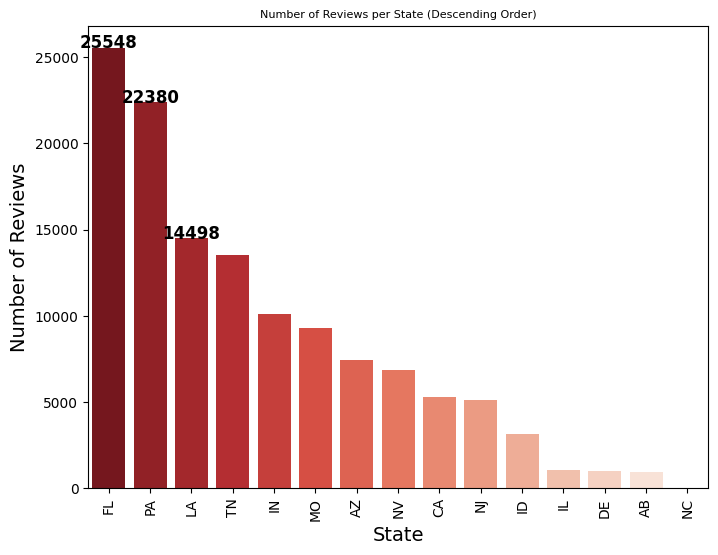

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by review_count in descending order
state_review_counts = state_review_counts.sort_values(by='review_count', ascending=False).reset_index(drop=True)

# Create a custom red palette where higher numbers are darker
red_palette = sns.color_palette("Reds", len(state_review_counts))
red_palette.reverse()  # Reverse the palette to make higher numbers darker

# Plotting the number of reviews per state in descending order with the custom red palette
plt.figure(figsize=(8,6))
sns.barplot(x='state', y='review_count', data=state_review_counts, palette=red_palette)
plt.title('Number of Reviews per State (Descending Order)', fontsize=8)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=90)

# Annotate the top 3 states
for i in range(3):
    plt.text(i, state_review_counts['review_count'][i] + 5,
             f'{state_review_counts["review_count"][i]}',
             color='black', ha="center", fontsize=12, fontweight='bold')

plt.show()


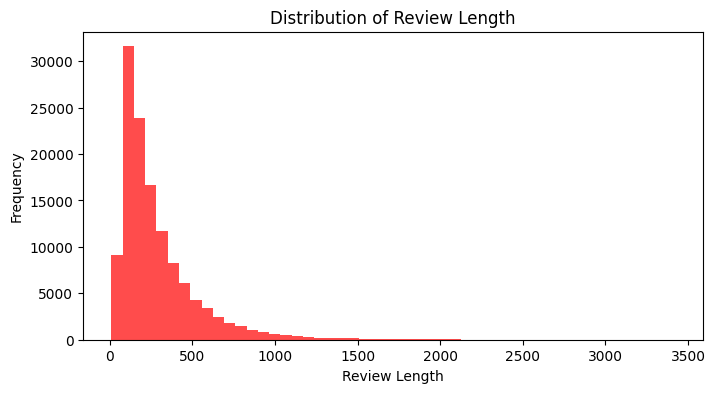

In [ ]:
df['review_length'] = df['cleaned_text'].apply(len)
plt.figure(figsize=(8, 4))
plt.hist(df['review_length'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

Let's filter dataset for reviews from the states of Florida (FL), Pennsylvania (PA), and Los Angeles (LA)

In [ ]:
# Filter for reviews in FL, PA, and LA
filtered_df = df[df['state'].isin(['FL', 'PA', 'LA'])]


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62426 entries, 1 to 125952
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_id      62426 non-null  object 
 1   user_id        62426 non-null  object 
 2   business_id    62426 non-null  object 
 3   stars_x        62426 non-null  int64  
 4   date           62426 non-null  object 
 5   name           62426 non-null  object 
 6   city           62426 non-null  object 
 7   state          62426 non-null  object 
 8   postal_code    62426 non-null  object 
 9   latitude       62426 non-null  float64
 10  longitude      62426 non-null  float64
 11  stars_y        62426 non-null  float64
 12  review_count   62426 non-null  int64  
 13  categories     62426 non-null  object 
 14  cleaned_text   62426 non-null  object 
 15  sentiment      62426 non-null  float64
 16  review_length  62426 non-null  int64  
dtypes: float64(4), int64(3), object(10)
memory usage: 8.6+

In [ ]:
# Count the number of reviews (length of the 'stars_x' column) for each state
review_counts = filtered_df.groupby('state')['stars_x'].count()

# Display the number of reviews for each state
print(review_counts)

state
FL    25548
LA    14498
PA    22380
Name: stars_x, dtype: int64


Import Libraries for text preprocessing

In [ ]:
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import spacy

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Remove stopwords

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


Create bigram and trigram models to form Bigrams and Trigrams

In [ ]:
# Create bigram and trigram models

# Assuming you have a pandas DataFrame named 'df' with a column 'cleaned_text'
# Import pandas
import pandas as pd

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = stopwords.words('english')

# Example DataFrame (replace with your actual data)
filtered_df = pd.DataFrame({'cleaned_text': ["This is the first document.", "This document is the second document.", "And this is the third one.", "Is this the first document?"]})

# Preprocess and tokenize the 'cleaned_text' column using simple_preprocess
texts = [simple_preprocess(doc) for doc in df['cleaned_text']]

# Create bigram and trigram models
bigram = Phrases(texts, min_count=5, threshold=100)
trigram = Phrases(bigram[texts], threshold=100)

# Faster way to get a sentence with bigrams/trigrams
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization: To reduce words to their base form, but here we’ll limit it to nouns, verbs, and adjectives.

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for lemmatization)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Lemmatize the words, keeping only nouns, adjectives, verbs, and adverbs"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


Apply the Preprocessing Steps

In [ ]:
# Assume 'texts' is a list of tokenized text data

# Remove stopwords
texts_nostops = remove_stopwords(texts)

# Form bigrams
texts_bigrams = make_bigrams(texts_nostops)

# Form trigrams
texts_trigrams = make_trigrams(texts_bigrams)

# Lemmatization keeping only nouns, adjectives, verbs, and adverbs
texts_lemmatized = lemmatization(texts_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB'])


Create Dictionary and Corpus

In [ ]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(texts_lemmatized)

# Filter out extremes to limit the number of features
id2word.filter_extremes(no_below=15, no_above=0.5)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts_lemmatized]

Now we have id2word (the dictionary) and corpus (the term-document frequency) ready to be used for LDA modeling.

In [ ]:
import gensim
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
# Define the number of topics
num_topics = 5  # You can adjust this based on your dataset and objectives

# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=num_topics,
                     random_state=100,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.042*"go" + 0.032*"get" + 0.031*"make" + 0.027*"restaurant" + 0.026*"try" + 0.023*"eat" + 0.023*"ve" + 0.023*"place" + 0.017*"m" + 0.014*"look"
Topic: 1 
Words: 0.032*"chicken" + 0.030*"pizza" + 0.026*"fry" + 0.025*"sauce" + 0.022*"taste" + 0.020*"sandwich" + 0.020*"flavor" + 0.019*"salad" + 0.018*"cheese" + 0.017*"side"
Topic: 2 
Words: 0.064*"table" + 0.036*"sit" + 0.033*"bar" + 0.031*"seat" + 0.020*"dining" + 0.018*"reservation" + 0.015*"parking" + 0.014*"room" + 0.014*"stay" + 0.014*"beef"
Topic: 3 
Words: 0.065*"good" + 0.056*"food" + 0.046*"great" + 0.030*"place" + 0.027*"service" + 0.021*"love" + 0.018*"amazing" + 0.018*"staff" + 0.016*"come" + 0.015*"nice"
Topic: 4 
Words: 0.064*"order" + 0.036*"time" + 0.025*"get" + 0.025*"take" + 0.023*"wait" + 0.023*"come" + 0.022*"say" + 0.021*"food" + 0.015*"ask" + 0.014*"tell"


In [ ]:
# Compute Perplexity (a measure of how well the model fits the data; lower is better)
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)





Perplexity:  -6.849336863199462

Coherence Score:  0.5475409147492368


Coherence score of 0.547 suggests that there is room for improvement. Lets work on LDA in package gensism.


In [ ]:
# Define the number of topics
num_topics = 4 # You can adjust this based on your dataset and objectives

# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=num_topics,
                     random_state=100,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.043*"go" + 0.035*"food" + 0.034*"time" + 0.030*"get" + 0.025*"make" + 0.022*"place" + 0.019*"restaurant" + 0.018*"ve" + 0.016*"eat" + 0.014*"m"
Topic: 1 
Words: 0.028*"order" + 0.023*"chicken" + 0.023*"good" + 0.021*"pizza" + 0.019*"fry" + 0.018*"sauce" + 0.016*"taste" + 0.016*"get" + 0.014*"sandwich" + 0.014*"flavor"
Topic: 2 
Words: 0.067*"order" + 0.028*"wait" + 0.025*"say" + 0.021*"come" + 0.021*"ask" + 0.020*"table" + 0.019*"tell" + 0.018*"take" + 0.017*"minute" + 0.016*"customer"
Topic: 3 
Words: 0.051*"good" + 0.046*"great" + 0.035*"food" + 0.027*"service" + 0.026*"place" + 0.021*"love" + 0.018*"amazing" + 0.017*"come" + 0.017*"staff" + 0.015*"nice"


In [ ]:
# Compute Perplexity (a measure of how well the model fits the data; lower is better)
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.830331616476068

Coherence Score:  0.5521217932055769


Evaluate the model

In [ ]:
pyLDAvis.save_html(lda_vis, 'lda_visualization.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
lda_vis = gensimvis.prepare(lda_model, corpus, id2word)

# Display the visualization
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
lda_vis = gensimvis.prepare(lda_model, corpus, id2word)

# Display the visualization
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
pyLDAvis.save_html(lda_vis, 'lda_visualization.html')

NameError: name 'pyLDAvis' is not defined

The second model with 4 topics is performing better as compared to previous model with 5 topics. The topics are more distinct with less overlap, and the salient terms are more evenly distributed, indicating that this model is better at capturing different themes within the dataset.

###Model Interpretation
Intertopic Distance Map - This map provides a visual representation of how distinct the topics are from each other in the topic space.

Separation: Topics are more separated compared to the first image, especially Topic 1 and Topic 4, which are quite distinct.
Overlap: There is less overlap between topics, indicating that the topics might be capturing more distinct themes.
Spread: The topics are more evenly spread, suggesting better differentiation.

This suggests that the LDA model represented in the second image has a more coherent and distinct topic structure making it the better-performing model of the two.

###Summary of Labels

Labeling topics in an LDA model involves interpreting the most prominent words in each topic and giving the topic a descriptive name based on those words.



Topic 0: Dining Experience (words like go, time, place, restaurant, eat suggest that this topic is about the overall experience of dining out, including the actions of going out, spending time, and eating at a restaurant).

Topic 1: Food Quality and Flavor (words like order, chicken, good, pizza, fry, sauce, taste, and flavor, which indicates a focus on the quality and flavor of the food, particularly items like chicken, pizza, and fries).

Topic 2: Service and Wait Time (words like order, wait, say, come, ask, table, tell, take, minute, and customer" point towards service-related aspects of dining, including the time spent waiting, interactions with staff, and customer service).

Topic 3: Positive Reviews (words like good, great, food, service, place, love, amazing, staff, and nice indicate a focus on positive aspects of the dining experience, such as good service, great food, and a pleasant atmosphere.)